# Quickstart

This is a minimal Tidy3D script showing the FDTD simulation of a dielectric cube in the presence of a point dipole.

Before running this notebook, make sure to have:

1. [Installed tidy3d](../quickstart.html#installation-of-tidy3d-python-api)
2. [Generate your free API key](https://tidy3d.simulation.cloud/account)
3. [Optional - Configured your API key](../quickstart.html#installation-of-tidy3d-python-api#linking-registration)

In [12]:
# import packages and authenticate (if needed)
import matplotlib.pylab as plt
import numpy as np
import tidy3d as td
import tidy3d.web as web

# web.configure("YOUR API KEY GOES HERE")

First, we use the convenience class [FreqRange](https://docs.flexcompute.com/projects/tidy3d/en/latest/api/_autosummary/tidy3d.FreqRange.html) to define the basic frequency-related parameters of the simulation.

In [13]:
lda0 = 0.75  # wavelength of interest (length scales are micrometers in Tidy3D)
freq0 = td.C_0 / lda0  # frequency of interest
fwidth = freq0 / 10.0  # desired freq. bandwidth

freq_range = td.FreqRange(freq0=freq0, fwidth=fwidth)  # set frequency range

Create a [Structure](../api/_autosummary/tidy3d.Structure.html#tidy3d.Structure) from a [Geometry](../api/geometry.html) like this rectangular prism [Box](../api/_autosummary/tidy3d.Box.html#tidy3d.Box) and assign a [Medium](../api/_autosummary/tidy3d.Medium.html#tidy3d.Medium) to represent its optical properties.

In [14]:
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)), medium=td.Medium(permittivity=2.0)
)

Create a [Source](../api/sources.html). In this case, it is a [PointDipole](../api/_autosummary/tidy3d.PointDipole.html#tidy3d.PointDipole), which is a uniform current source with a zero size.

In [15]:
# create source
source = td.PointDipole(
    center=(-1.5, 0, 0),  # position of the dipole
    source_time=freq_range.to_gaussian_pulse(),  # time profile of the source
    polarization="Ey",  # polarization of the dipole
)

Create a [Monitor](../api/monitors.html) like a [FieldMonitor](../api/_autosummary/tidy3d.FieldMonitor.html#tidy3d.FieldMonitor) to record electromagnetic fields in the frequency domain at `freq0`. 

In [16]:
# create monitor
monitor = td.FieldMonitor(
    center=(0, 0, 0),  # center of the monitor
    size=(td.inf, td.inf, 0),  # size of the monitor
    freqs=freq_range.freqs(num_points=1),  # frequency points to record the fields at
    name="fields",
)

All these components are used to create a Tidy3D [Simulation](../api/_autosummary/tidy3d.Simulation.html):

In [17]:
sim = td.Simulation(
    size=(4, 3, 3),  # simulation domain size
    grid_spec=td.GridSpec.auto(
        min_steps_per_wvl=25
    ),  # automatic nonuniform FDTD grid with 25 grids per wavelength in the material
    structures=[square],
    sources=[source],
    monitors=[monitor],
    run_time=3e-13,  # physical simulation time in second
)

In [18]:
# visualize in 3D
sim.plot_3d()

In [19]:
print(
    f"simulation grid is shaped {sim.grid.num_cells} for {int(np.prod(sim.grid.num_cells) / 1e6)} million cells."
)

simulation grid is shaped [179, 147, 147] for 3 million cells.


The [python web API](../api/submit_simulations.html) is used to [run](../api/_autosummary/tidy3d.web.run.html#tidy3d.web.run) your simulation quickly in the cloud. The output data is stored in a [SimulationData](../api/_autosummary/tidy3d.SimulationData.html#tidy3d.SimulationData) container.

In [20]:
# run simulation
data = td.web.run(sim, task_name="quickstart", path="data/data.hdf5", verbose=True)

11:27:54 EDT Created task 'quickstart' with task_id                             
             'fdve-08497039-7352-4e15-9249-73b62fad435c' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=836164;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08497039-7352-4e15-9249-73b62fad435c\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=305933;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08497039-7352-4e15-9249-73b62fad435c\taskId]8;;\]8;id=836164;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08497039-7352-4e15-9249-73b62fad435c\=]8;;\]8;id=132254;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08497039-7352-4e15-9249-73b62fad435c\fdve]8;;\]8;id=836164;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08497039-7352-4e15-9249-73b62fad435c\-08497039-735]8;;\
             ]8;id=836164;https://tidy3d.simulation.cloud/workbench?taskId=fdve-08497039-7352-4e15-9249-73b62fad435c\2-4e15-9249-73b62fad435c']8;;\.

             Task folder: ]8;id=801163;https://tidy3d.simulation.cloud/folders/folder-f7b925a9-b2c3-4519-8f36-17122860e556\'default']8;;\.

Output()

11:28:00 EDT Maximum FlexCredit cost: 0.025. Minimum cost depends on task       
             execution details. Use 'web.real_cost(task_id)' to get the billed  
             FlexCredit cost after a simulation run.

             status = success

Output()

11:28:03 EDT loading simulation from data/data.hdf5

In [21]:
# see the log
print(data.log)

[02:49:23] INFO: Auto meshing using wavelength 0.7575 defined from sources.     
           INFO: Auto meshing using wavelength 0.7575 defined from sources.     
           USER: Simulation domain Nx, Ny, Nz: [179, 147, 147]                  
           USER: Applied symmetries: (0, 0, 0)                                  
           USER: Number of computational grid points: 4.0184e+06.               
           USER: Subpixel averaging method: SubpixelSpec(attrs={},              
           dielectric=PolarizedAveraging(attrs={}, type='PolarizedAveraging'),  
           metal=Staircasing(attrs={}, type='Staircasing'),                     
           pec=PECConformal(attrs={}, type='PECConformal',                      
           timestep_reduction=0.3), lossy_metal=SurfaceImpedance(attrs={},      
           type='SurfaceImpedance', timestep_reduction=0.0),                    
           type='SubpixelSpec')                                                 
           USER: Number of t

This monitor data can be easily plotted through available [plot methods](../api/_autosummary/tidy3d.SimulationData.html#tidy3d.SimulationData.plot_field). You can also save, modify, and custom plot the raw [FieldData](../api/_autosummary/tidy3d.FieldData.html) and more.

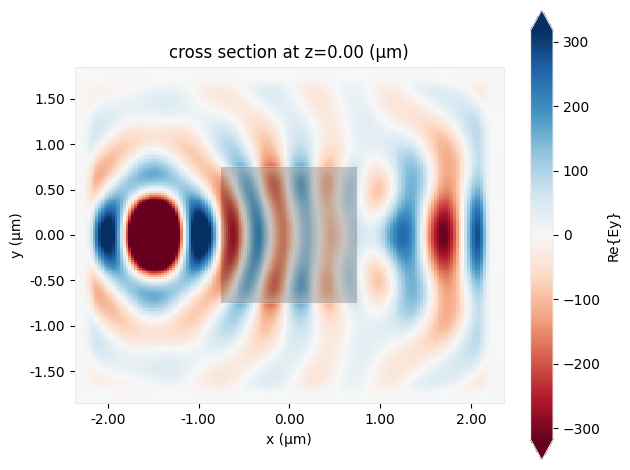

In [22]:
# plot the field data stored in the monitor
ax = data.plot_field("fields", "Ey", z=0)

See all our [examples](https://www.flexcompute.com/tidy3d/learning-center/example-library/) to help you with your own designs!